# Sentimen Analisis Review Aplikasi Livin' by Mandiri

Selamat datang dalam proyek Sentimen Analisi Review APK Play Store ini! Dalam era digital yang berkembang pesat ini, ulasan pengguna memiliki peran penting dalam membentuk persepsi terhadap aplikasi mobile. Dalam proyek ini, kita akan menjelajahi dunia analisis sentimen untuk memahami bagaimana orang merasakan dan mengungkapkan pendapat mereka tentang aplikasi di Google Play Store.

Analisis sentimen adalah salah satu cabang penting dalam pemrosesan bahasa alami yang memungkinkan kita untuk secara otomatis mengidentifikasi apakah ulasan pengguna cenderung positif, negatif, atau netral. Dengan demikian, proyek ini akan membantu kita dalam memahami umpan balik pengguna dengan lebih baik, dan dapat digunakan untuk mengambil keputusan yang lebih baik dalam pengembangan dan perbaikan aplikasi.

Dalam perjalanan ini, kita akan menggali konsep-konsep penting dalam analisis sentimen, seperti pengolahan teks, ekstraksi fitur, dan penggunaan model machine learning untuk memprediksi sentimen ulasan. Kami akan menggunakan bahasa pemrograman Python dan beberapa pustaka populer seperti NLTK, scikit-learn, dan TensorFlow.

Tentunya, proyek ini akan memberi Anda wawasan yang berharga dalam analisis sentimen dan keterampilan pemrograman yang relevan. Mari kita mulai memahami bagaimana kita dapat mengungkap sentimen di balik ulasan pengguna di Play Store!

Pada proyek ini, kita akan melakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait aplikasi "Livin' by Mandiri" di Play Store. Analisis sentimen akan membantu kita untuk memahami bagaimana pengguna merasakan dan mengungkapkan pandangan mereka terhadap aplikasi ini.

Dengan menggunakan berbagai teknik pemrosesan teks dan algoritma machine learning, kita akan mencoba mengidentifikasi apakah ulasan pengguna terhadap aplikasi "Livin' by Mandiri" cenderung positif, negatif, atau netral. Hasil analisis sentimen ini dapat memberikan wawasan berharga kepada pengembang aplikasi untuk meningkatkan pengalaman pengguna. Mari kita mulai menjelajahi ulasan pengguna dan menganalisis sentimen di sekitar aplikasi "Livin' by Mandiri" dengan lebih mendalam.


## Import Library

In [1]:
# Mengabaikan peringatan yang tidak penting
import warnings
warnings.simplefilter('ignore')

# Memastikan bahwa pustaka yang diperlukan telah terinstal
!pip install Sastrawi wordcloud

# Impor pustaka yang dibutuhkan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi matematika
import re  # Untuk ekspresi reguler
import nltk  # Untuk pengolahan bahasa alami
from nltk.corpus import stopwords  # Untuk mengakses kata-kata stopword
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Untuk stemming bahasa Indonesia
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih canggih
from wordcloud import WordCloud  # Untuk membuat wordcloud visualisasi teks
import joblib  # Untuk menyimpan dan memuat model terlatih
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi training dan testing
from sklearn.feature_extraction.text import TfidfVectorizer  # Untuk mengubah teks menjadi vektor fitur dengan TF-IDF
from sklearn.ensemble import RandomForestClassifier  # Model Random Forest
from sklearn.svm import SVC  # Model Support Vector Classifier
from gensim.models import Word2Vec  # Untuk representasi kata menggunakan Word2Vec
from sklearn.metrics import accuracy_score, classification_report  # Untuk evaluasi model
from imblearn.over_sampling import SMOTE  # Untuk mengatasi masalah ketidakseimbangan kelas dalam dataset

## Memuat Dataset

In [2]:
pd.set_option('display.max_colwidth', None)
conten = pd.read_csv('ulasan_livin_by_mandiri.csv')
conten

,content
0,"setelah di-update malah nggak bisa berjalan seperti biasa lagi, padahal kata aplikasi nya kompatibel dg handphone ini, pas mau membuka ada 2 opsi, ""belum punya rekening mandiri"" dan ""punya kartu debit/kredit mandiri"" tapi saat diklik nggak bisa kebuka malah kembali ke AppStore, jika terpisah ngeklik nya langsung nutup, tolong diperbaiki lagi aplikasinya ataupun kembalikan ke sistem yg lama aja. penambahan fitur2 jualan itu nggak perlu sebenarnya, sepertinya aplikasi ini memaksakan ""sukha"" dech."
1,"Lagi-lagi, tolong sistemnya di perbaiki, setiap mau transaksi selalu ada pemberitahuan aktifkan jam otomatis, sesudah di aktifkan masih tdk bisa transaksi, sampai berkali2 selualu muncul coba beberapa saat, setelah beberapa saat masih tdk bisa... tolonglah di perbaiki sistemnya"
2,Livin mandiri lagi kenapa ini ya???? Mau buka aplikasi loading ya lamaaaa amat pdhl paket internet saya masih banyak.. Sekali nyoba buka pake wifi tapi sama aja tetep lama.. Tolong sistem diperbaiki.. Sangat mengganggu. Padahl biasa ya sangat mudah dan cepat loading ya.
3,"Bener kata orang², apk ini sering ada kendala terus ketika transaksi. Ternyata saya juga mengalami sendiri, buat transaksi transfer/narik uang gabisa, udah direstart berulang kali, sampe uninstall ulang, bahkan sampe setting jam otomatis-non otomatis pun juga sama gaada bedanya tetep gabisa buat transaksi. Coba diperbaiki aplikasinya, jangan menyusahkan orang banyaaakkkkk..."
4,"aplikasi nya cepat bagua, cuma kurang suka nya terlalu lama buat tidak transfernya,, dari jam 22.30-01.00 itu sangat lama, dan lebih ga nyaman nya lagi, jam 1.30 udah mulai pemeliharaan sampe jam 02.30 itu yangg bikin tidak nyaman, tolong dikasuh kebijaksanaan soalnya ituu tutup transfer aja lama banget, ditambah jam 1.30 pemeliharaan sistem lama juga."
...,...
9995,"Bisa tolong munculkn pinjmana KSM lagi bank mandiri,, Terima kasih"
9996,"Kenapa ya tidak ada layanan produk ksm topup pinjaman,kartu kredit dan paylater nya..susah untuk ada fitur itu"
9997,Ini kenapa ya Livin lagi bermasalah kah. Mau transfer atau topup pun gak bisa.. Di hub CC malah gak diangkat.. Apa harus disamperin ke kantor nya dulu baru di proses. Kalo gini kan mau ngirim uang jadi gak bisa malah jadi repot..😡😡
9998,Tidak bisa vermuk gimn ini aplikasinya hadeeeh kurang akurat dan bikin pusing klo vermuk berkali kali tetapi masih gagal tolong perbaikilah


## Preprocessing

## Preprocessing: Removing Punctuation, Case Folding & Removing URLs, Username

Sebelum melakukan analisis sentimen, data harus diproses agar lebih bersih dan mudah dianalisis. Tahapan pre-processing yang dilakukan meliputi:

**Removing Punctuation**  
   - Menghapus tanda baca seperti titik (.), koma (,), tanda tanya (?), dan simbol lainnya agar tidak memengaruhi hasil analisis.

 **Case Folding**  
   - Mengubah seluruh teks menjadi huruf kecil (lowercase) untuk menghindari perbedaan makna akibat perbedaan kapitalisasi.

**Removing URLs & Username**  
   - Menghapus URL (contoh: `https://example.com`) yang tidak relevan dengan analisis.
   - Menghapus username (contoh: `@username`) yang biasanya muncul di media sosial agar tidak mengganggu pemrosesan teks.

Tahapan ini membantu meningkatkan kualitas data sebelum masuk ke tahap tokenisasi dan analisis lebih lanjut.


In [3]:
# Define regex patterns for URL, username, and hashtag
url_pattern = re.compile(r'http[s]?://\S+')
username_pattern = re.compile(r'@[A-Za-z0-9_]+')
hashtag_pattern = re.compile(r'#\w+\b')

# Define function for preprocessing
def preprocess_text(text):
    # Remove punctuation (except "@")
    text = re.sub(r'[^\w\s@]|[\d]', '', text)

    # Case folding
    text = text.lower()

    # Remove URL, username, and hashtag
    text = re.sub(url_pattern, '', text)
    text = re.sub(username_pattern, '', text)
    text = re.sub(hashtag_pattern, '', text)

    return text

# Read data from CSV file
data = conten

# Apply preprocessing function to 'Tweet' column
data['content'] = data['content'].apply(preprocess_text)

# Remove remaining URLs
data['content'] = data['content'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

data_pre = data


In [4]:
data_pre.head()

,content
0,setelah diupdate malah nggak bisa berjalan seperti biasa lagi padahal kata aplikasi nya kompatibel dg handphone ini pas mau membuka ada opsi belum punya rekening mandiri dan punya kartu debitkredit mandiri tapi saat diklik nggak bisa kebuka malah kembali ke appstore jika terpisah ngeklik nya langsung nutup tolong diperbaiki lagi aplikasinya ataupun kembalikan ke sistem yg lama aja penambahan fitur jualan itu nggak perlu sebenarnya sepertinya aplikasi ini memaksakan sukha dech
1,lagilagi tolong sistemnya di perbaiki setiap mau transaksi selalu ada pemberitahuan aktifkan jam otomatis sesudah di aktifkan masih tdk bisa transaksi sampai berkali selualu muncul coba beberapa saat setelah beberapa saat masih tdk bisa tolonglah di perbaiki sistemnya
2,livin mandiri lagi kenapa ini ya mau buka aplikasi loading ya lamaaaa amat pdhl paket internet saya masih banyak sekali nyoba buka pake wifi tapi sama aja tetep lama tolong sistem diperbaiki sangat mengganggu padahl biasa ya sangat mudah dan cepat loading ya
3,bener kata orang² apk ini sering ada kendala terus ketika transaksi ternyata saya juga mengalami sendiri buat transaksi transfernarik uang gabisa udah direstart berulang kali sampe uninstall ulang bahkan sampe setting jam otomatisnon otomatis pun juga sama gaada bedanya tetep gabisa buat transaksi coba diperbaiki aplikasinya jangan menyusahkan orang banyaaakkkkk
4,aplikasi nya cepat bagua cuma kurang suka nya terlalu lama buat tidak transfernya dari jam itu sangat lama dan lebih ga nyaman nya lagi jam udah mulai pemeliharaan sampe jam itu yangg bikin tidak nyaman tolong dikasuh kebijaksanaan soalnya ituu tutup transfer aja lama banget ditambah jam pemeliharaan sistem lama juga


## Pre-processing: Normalisasi Kata Menggunakan Kamus Alay  

Dalam review **Livin' by Mandiri**, banyak pengguna menggunakan bahasa tidak baku. Normalisasi diperlukan untuk mengubah kata tidak baku menjadi kata baku agar analisis lebih akurat.  

In [5]:
# Load the colloquial Indonesian lexicon as a dictionary
kamus_alay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv', delimiter=',')
kamus_alay_dict = {}
for index, row in kamus_alay.iterrows():
    kamus_alay_dict[row['slang']] = row['formal']

# Read preprocessed content data into a DataFrame
data_norm = data_pre

# Apply normalization to 'content' column
data_norm['content_Normalized'] = data_norm['content'].apply(lambda x: ' '.join([kamus_alay_dict[word] if word.lower() != 'spt' and word in kamus_alay_dict else word for word in x.split()]))

# Create new DataFrame for normalized content data
data_normalisasi = pd.DataFrame()
data_normalisasi['Word_Before_Normalization'] = data_norm['content'].apply(lambda x: [word for word in x.split()])
data_normalisasi['Word_After_Normalization'] = data_norm['content_Normalized'].apply(lambda x: [word for word in x.split()])



In [6]:
data_normalisasi.head()

,Word_Before_Normalization,Word_After_Normalization
0,"[setelah, diupdate, malah, nggak, bisa, berjalan, seperti, biasa, lagi, padahal, kata, aplikasi, nya, kompatibel, dg, handphone, ini, pas, mau, membuka, ada, opsi, belum, punya, rekening, mandiri, dan, punya, kartu, debitkredit, mandiri, tapi, saat, diklik, nggak, bisa, kebuka, malah, kembali, ke, appstore, jika, terpisah, ngeklik, nya, langsung, nutup, tolong, diperbaiki, lagi, aplikasinya, ataupun, kembalikan, ke, sistem, yg, lama, aja, penambahan, fitur, jualan, itu, nggak, perlu, sebenarnya, sepertinya, aplikasi, ini, memaksakan, sukha, dech]","[setelah, diupdate, malah, enggak, bisa, berjalan, seperti, biasa, lagi, padahal, kata, aplikasi, nya, kompatibel, dengan, handphone, ini, pas, mau, membuka, ada, opsi, belum, punya, rekening, mandiri, dan, punya, kartu, debitkredit, mandiri, tapi, saat, diklik, enggak, bisa, kebuka, malah, kembali, ke, appstore, jika, terpisah, ngeklik, nya, langsung, nutup, tolong, diperbaiki, lagi, aplikasinya, ataupun, kembalikan, ke, sistem, yang, lama, saja, penambahan, fitur, jualan, itu, enggak, perlu, sebenarnya, sepertinya, aplikasi, ini, memaksakan, sukha, deh]"
1,"[lagilagi, tolong, sistemnya, di, perbaiki, setiap, mau, transaksi, selalu, ada, pemberitahuan, aktifkan, jam, otomatis, sesudah, di, aktifkan, masih, tdk, bisa, transaksi, sampai, berkali, selualu, muncul, coba, beberapa, saat, setelah, beberapa, saat, masih, tdk, bisa, tolonglah, di, perbaiki, sistemnya]","[lagilagi, tolong, sistemnya, di, perbaiki, setiap, mau, transaksi, selalu, ada, pemberitahuan, aktifkan, jam, otomatis, sesudah, di, aktifkan, masih, tidak, bisa, transaksi, sampai, berkali, selualu, muncul, coba, beberapa, saat, setelah, beberapa, saat, masih, tidak, bisa, tolonglah, di, perbaiki, sistemnya]"
2,"[livin, mandiri, lagi, kenapa, ini, ya, mau, buka, aplikasi, loading, ya, lamaaaa, amat, pdhl, paket, internet, saya, masih, banyak, sekali, nyoba, buka, pake, wifi, tapi, sama, aja, tetep, lama, tolong, sistem, diperbaiki, sangat, mengganggu, padahl, biasa, ya, sangat, mudah, dan, cepat, loading, ya]","[livin, mandiri, lagi, kenapa, ini, ya, mau, buka, aplikasi, loading, ya, lamaaaa, amat, padahal, paket, internet, saya, masih, banyak, sekali, mencoba, buka, pakai, wifi, tapi, sama, saja, tetap, lama, tolong, sistem, diperbaiki, sangat, mengganggu, padahal, biasa, ya, sangat, mudah, dan, cepat, loading, ya]"
3,"[bener, kata, orang², apk, ini, sering, ada, kendala, terus, ketika, transaksi, ternyata, saya, juga, mengalami, sendiri, buat, transaksi, transfernarik, uang, gabisa, udah, direstart, berulang, kali, sampe, uninstall, ulang, bahkan, sampe, setting, jam, otomatisnon, otomatis, pun, juga, sama, gaada, bedanya, tetep, gabisa, buat, transaksi, coba, diperbaiki, aplikasinya, jangan, menyusahkan, orang, banyaaakkkkk]","[benar, kata, orang², apk, ini, sering, ada, kendala, terus, ketika, transaksi, ternyata, saya, juga, mengalami, sendiri, buat, transaksi, transfernarik, uang, enggak, bisa, sudah, direstart, berulang, kali, sampai, uninstall, ulang, bahkan, sampai, setting, jam, otomatisnon, otomatis, pun, juga, sama, enggak, ada, bedanya, tetap, enggak, bisa, buat, transaksi, coba, diperbaiki, aplikasinya, jangan, menyusahkan, orang, banyaaakkkkk]"
4,"[aplikasi, nya, cepat, bagua, cuma, kurang, suka, nya, terlalu, lama, buat, tidak, transfernya, dari, jam, itu, sangat, lama, dan, lebih, ga, nyaman, nya, lagi, jam, udah, mulai, pemeliharaan, sampe, jam, itu, yangg, bikin, tidak, nyaman, tolong, dikasuh, kebijaksanaan, soalnya, ituu, tutup, transfer, aja, lama, banget, ditambah, jam, pemeliharaan, sistem, lama, juga]","[aplikasi, nya, cepat, bagua, cuma, kurang, suka, nya, terlalu, lama, buat, tidak, transfernya, dari, jam, itu, sangat, lama, dan, lebih, enggak, nyaman, nya, lagi, jam, sudah, mulai, pemeliharaan, sampai, jam, itu, yangg, bikin, tidak, nyaman, tolong, dikasuh, kebijaksanaan, soalnya, itu, tutup, transfer, saja, lama, banget, ditambah, jam, pem

In [7]:
data_normalisasi_kata = pd.DataFrame(data_normalisasi['Word_After_Normalization'].apply(lambda x: ' '.join(x)), columns=['Word_After_Normalization'])

## Pre-processing: Stopwords Removal  

Stopwords adalah kata-kata umum yang sering muncul dalam teks tetapi tidak memiliki makna signifikan dalam analisis sentimen, seperti *"dan"*, *"atau"*, *"yang"*, dan sejenisnya. Menghapus stopwords membantu model fokus pada kata-kata yang lebih bermakna dalam menentukan sentimen.  

### Contoh Stopwords dalam Bahasa Indonesia  
- Kata umum: *"saya"*, *"dia"*, *"kita"*, *"adalah"*, *"dengan"*.  
- Kata dalam review aplikasi: *"aplikasi ini"*, *"sangat bagus"*, *"tidak bisa"*.  

### Contoh Sebelum & Sesudah Stopwords Removal  
- Sebelum: *"Aplikasi ini sangat bagus, tapi kadang lemot."*  
- Sesudah: *"aplikasi bagus kadang lemot"*  

Menghapus stopwords membantu meningkatkan akurasi analisis dengan mengurangi kata-kata yang tidak relevan.  


In [8]:
Normalisasi = data_normalisasi_kata.copy() # Menggunakan DataFrame "data_normalisasi_kata"

# Mengambil kamus stop words bahasa Indonesia dari NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk melakukan stopword removal
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Mengaplikasikan fungsi remove_stopwords pada kolom "Tweet"
Normalisasi['Word_After_Normalization_StopWords'] = Normalisasi['Word_After_Normalization'].apply(remove_stopwords)

# Menyimpan hasil dalam DataFrame stopword_removal
data_stopwords = Normalisasi

data_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word_After_Normalization,Word_After_Normalization_StopWords
0,setelah diupdate malah enggak bisa berjalan seperti biasa lagi padahal kata aplikasi nya kompatibel dengan handphone ini pas mau membuka ada opsi belum punya rekening mandiri dan punya kartu debitkredit mandiri tapi saat diklik enggak bisa kebuka malah kembali ke appstore jika terpisah ngeklik nya langsung nutup tolong diperbaiki lagi aplikasinya ataupun kembalikan ke sistem yang lama saja penambahan fitur jualan itu enggak perlu sebenarnya sepertinya aplikasi ini memaksakan sukha deh,diupdate berjalan aplikasi nya kompatibel handphone pas membuka opsi rekening mandiri kartu debitkredit mandiri diklik kebuka appstore terpisah ngeklik nya langsung nutup tolong diperbaiki aplikasinya kembalikan sistem penambahan fitur jualan aplikasi memaksakan sukha deh
1,lagilagi tolong sistemnya di perbaiki setiap mau transaksi selalu ada pemberitahuan aktifkan jam otomatis sesudah di aktifkan masih tidak bisa transaksi sampai berkali selualu muncul coba beberapa saat setelah beberapa saat masih tidak bisa tolonglah di perbaiki sistemnya,lagilagi tolong sistemnya perbaiki transaksi pemberitahuan aktifkan jam otomatis aktifkan transaksi berkali selualu muncul coba tolonglah perbaiki sistemnya
2,livin mandiri lagi kenapa ini ya mau buka aplikasi loading ya lamaaaa amat padahal paket internet saya masih banyak sekali mencoba buka pakai wifi tapi sama saja tetap lama tolong sistem diperbaiki sangat mengganggu padahal biasa ya sangat mudah dan cepat loading ya,livin mandiri ya buka aplikasi loading ya lamaaaa paket internet mencoba buka pakai wifi tolong sistem diperbaiki mengganggu ya mudah cepat loading ya
3,benar kata orang² apk ini sering ada kendala terus ketika transaksi ternyata saya juga mengalami sendiri buat transaksi transfernarik uang enggak bisa sudah direstart berulang kali sampai uninstall ulang bahkan sampai setting jam otomatisnon otomatis pun juga sama enggak ada bedanya tetap enggak bisa buat transaksi coba diperbaiki aplikasinya jangan menyusahkan orang banyaaakkkkk,orang² apk kendala transaksi mengalami transaksi transfernarik uang direstart berulang kali uninstall ulang setting jam otomatisnon otomatis bedanya transaksi coba diperbaiki aplikasinya menyusahkan orang banyaaakkkkk
4,aplikasi nya cepat bagua cuma kurang suka nya terlalu lama buat tidak transfernya dari jam itu sangat lama dan lebih enggak nyaman nya lagi jam sudah mulai pemeliharaan sampai jam itu yangg bikin tidak nyaman tolong dikasuh kebijaksanaan soalnya itu tutup transfer saja lama banget ditambah jam pemeliharaan sistem lama juga,aplikasi nya cepat bagua suka nya transfernya jam nyaman nya jam pemeliharaan jam yangg bikin nyaman tolong dikasuh kebijaksanaan tutup transfer banget ditambah jam pemeliharaan sistem
...,...,...
9995,bisa tolong munculkn pinjmana ksm lagi bank mandiri terima kasih,tolong munculkn pinjmana ksm bank mandiri terima kasih
9996,kenapa ya tidak ada layanan produk ksm topup pinjamankartu kredit dan paylater nyasusah untuk ada fitur itu,ya layanan produk ksm topup pinjamankartu kredit paylater nyasusah fitur
9997,ini kenapa ya livin lagi bermasalah kah mau transfer atau topup pun enggak bisa di hubungan cc malah enggak diangkat apa harus disamperin ke kantor nya dulu baru di proses kalo begini kan mau mengirim uang jadi enggak bisa malah jadi repot,ya livin bermasalah kah transfer topup hubungan cc diangkat disamperin kantor nya proses kalo mengirim uang repot
9998,tidak bisa vermuk bagaimana ini aplikasinya hadeeeh kurang akurat dan bikin pusing kalo vermuk berkali kali tetapi masih gagal tolong perbaikilah,vermuk aplikasinya hadeeeh akurat bikin pusing kalo vermuk berkali kali gagal tolong perbaikilah


## Pre-processing: Stemming dengan PySastrawi  

Stemming adalah proses mengubah kata menjadi bentuk dasar atau kata dasarnya. Dalam analisis sentimen, stemming membantu mengurangi variasi kata sehingga model dapat mengenali makna yang sama.  

### **Mengapa Stemming Diperlukan?**  
- Mengubah kata berimbuhan menjadi kata dasar, misalnya *"membuka"* → *"buka"*.  
- Mengurangi dimensi fitur dalam analisis teks.  

### **Contoh Sebelum & Sesudah Stemming**  
**Sebelum:** *"Aplikasi ini sangat membantu, digunakan dengan mudah."*  
**Sesudah:** *"aplikasi ini sangat bantu, guna dengan mudah."*  

In [9]:
try:
    # Coba membaca file yang sudah ada
    data_stem = pd.read_csv('stemming.csv')
except:
    # Jika file tidak ada, lakukan proses stemming dari data awal
    data_stem = data_stopwords

    # Define stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Define function for stemming
    def stem_text(text):
        words = text.split() if isinstance(text, str) else []  # Cek jika text adalah string
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)

    # Apply stemming ke kolom 'Word_After_Normalization_StopWords'
    data_stem['Word_Stemmed'] = data_stem['Word_After_Normalization_StopWords'].apply(stem_text)

    # Simpan hasil ke file CSV
    data_stem.to_csv('stemming.csv', index=False)

# Tampilkan beberapa baris pertama
data_stem.head()


,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed
0,setelah diupdate malah enggak bisa berjalan seperti biasa lagi padahal kata aplikasi nya kompatibel dengan handphone ini pas mau membuka ada opsi belum punya rekening mandiri dan punya kartu debitkredit mandiri tapi saat diklik enggak bisa kebuka malah kembali ke appstore jika terpisah ngeklik nya langsung nutup tolong diperbaiki lagi aplikasinya ataupun kembalikan ke sistem yang lama saja penambahan fitur jualan itu enggak perlu sebenarnya sepertinya aplikasi ini memaksakan sukha deh,diupdate berjalan aplikasi nya kompatibel handphone pas membuka opsi rekening mandiri kartu debitkredit mandiri diklik kebuka appstore terpisah ngeklik nya langsung nutup tolong diperbaiki aplikasinya kembalikan sistem penambahan fitur jualan aplikasi memaksakan sukha deh,diupdate jalan aplikasi nya kompatibel handphone pas buka opsi rekening mandiri kartu debitkredit mandiri klik buka appstore pisah ngeklik nya langsung nutup tolong baik aplikasi kembali sistem tambah fitur jual aplikasi paksa sukha deh
1,lagilagi tolong sistemnya di perbaiki setiap mau transaksi selalu ada pemberitahuan aktifkan jam otomatis sesudah di aktifkan masih tidak bisa transaksi sampai berkali selualu muncul coba beberapa saat setelah beberapa saat masih tidak bisa tolonglah di perbaiki sistemnya,lagilagi tolong sistemnya perbaiki transaksi pemberitahuan aktifkan jam otomatis aktifkan transaksi berkali selualu muncul coba tolonglah perbaiki sistemnya,lagilagi tolong sistem baik transaksi pemberitahuan aktif jam otomatis aktif transaksi kali selualu muncul coba tolong baik sistem
2,livin mandiri lagi kenapa ini ya mau buka aplikasi loading ya lamaaaa amat padahal paket internet saya masih banyak sekali mencoba buka pakai wifi tapi sama saja tetap lama tolong sistem diperbaiki sangat mengganggu padahal biasa ya sangat mudah dan cepat loading ya,livin mandiri ya buka aplikasi loading ya lamaaaa paket internet mencoba buka pakai wifi tolong sistem diperbaiki mengganggu ya mudah cepat loading ya,livin mandiri ya buka aplikasi loading ya lamaaaa paket internet coba buka pakai wifi tolong sistem baik ganggu ya mudah cepat loading ya
3,benar kata orang² apk ini sering ada kendala terus ketika transaksi ternyata saya juga mengalami sendiri buat transaksi transfernarik uang enggak bisa sudah direstart berulang kali sampai uninstall ulang bahkan sampai setting jam otomatisnon otomatis pun juga sama enggak ada bedanya tetap enggak bisa buat transaksi coba diperbaiki aplikasinya jangan menyusahkan orang banyaaakkkkk,orang² apk kendala transaksi mengalami transaksi transfernarik uang direstart berulang kali uninstall ulang setting jam otomatisnon otomatis bedanya transaksi coba diperbaiki aplikasinya menyusahkan orang banyaaakkkkk,orang apk kendala transaksi alami transaksi transfernarik uang direstart ulang kali uninstall ulang setting jam otomatisnon otomatis beda transaksi coba baik aplikasi susah orang banyaaakkkkk
4,aplikasi nya cepat bagua cuma kurang suka nya terlalu lama buat tidak transfernya dari jam itu sangat lama dan lebih enggak nyaman nya lagi jam sudah mulai pemeliharaan sampai jam itu yangg bikin tidak nyaman tolong dikasuh kebijaksanaan soalnya itu tutup transfer saja lama banget ditambah jam pemeliharaan sistem lama juga,aplikasi nya cepat bagua suka nya transfernya jam nyaman nya jam pemeliharaan jam yangg bikin nyaman tolong dikasuh kebijaksanaan tutup transfer banget ditambah jam pemeliharaan sistem,aplikasi nya cepat bagua suka nya transfer jam nyaman nya jam pelihara jam yangg bikin nyaman tolong dikasuh bijaksana tutup transfer banget tambah jam pelihara sistem


In [10]:
words_df = pd.DataFrame()
words_df['Before_Stemming'] = data_stem['Word_After_Normalization_StopWords'].str.split().explode().reset_index(drop=True)
words_df['After_Stemming'] = data_stem['Word_Stemmed'].str.split().explode().reset_index(drop=True)
pd.set_option('display.max_colwidth', None)

words_df.head(25)

,Before_Stemming,After_Stemming
0,diupdate,diupdate
1,berjalan,jalan
2,aplikasi,aplikasi
3,nya,nya
4,kompatibel,kompatibel
5,handphone,handphone
6,pas,pas
7,membuka,buka
8,opsi,opsi
9,rekening,rekening


In [11]:
look_labeled = pd.read_csv('stemming.csv')
look_labeled.head()

,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed
0,setelah diupdate malah enggak bisa berjalan seperti biasa lagi padahal kata aplikasi nya kompatibel dengan handphone ini pas mau membuka ada opsi belum punya rekening mandiri dan punya kartu debitkredit mandiri tapi saat diklik enggak bisa kebuka malah kembali ke appstore jika terpisah ngeklik nya langsung nutup tolong diperbaiki lagi aplikasinya ataupun kembalikan ke sistem yang lama saja penambahan fitur jualan itu enggak perlu sebenarnya sepertinya aplikasi ini memaksakan sukha deh,diupdate berjalan aplikasi nya kompatibel handphone pas membuka opsi rekening mandiri kartu debitkredit mandiri diklik kebuka appstore terpisah ngeklik nya langsung nutup tolong diperbaiki aplikasinya kembalikan sistem penambahan fitur jualan aplikasi memaksakan sukha deh,diupdate jalan aplikasi nya kompatibel handphone pas buka opsi rekening mandiri kartu debitkredit mandiri klik buka appstore pisah ngeklik nya langsung nutup tolong baik aplikasi kembali sistem tambah fitur jual aplikasi paksa sukha deh
1,lagilagi tolong sistemnya di perbaiki setiap mau transaksi selalu ada pemberitahuan aktifkan jam otomatis sesudah di aktifkan masih tidak bisa transaksi sampai berkali selualu muncul coba beberapa saat setelah beberapa saat masih tidak bisa tolonglah di perbaiki sistemnya,lagilagi tolong sistemnya perbaiki transaksi pemberitahuan aktifkan jam otomatis aktifkan transaksi berkali selualu muncul coba tolonglah perbaiki sistemnya,lagilagi tolong sistem baik transaksi pemberitahuan aktif jam otomatis aktif transaksi kali selualu muncul coba tolong baik sistem
2,livin mandiri lagi kenapa ini ya mau buka aplikasi loading ya lamaaaa amat padahal paket internet saya masih banyak sekali mencoba buka pakai wifi tapi sama saja tetap lama tolong sistem diperbaiki sangat mengganggu padahal biasa ya sangat mudah dan cepat loading ya,livin mandiri ya buka aplikasi loading ya lamaaaa paket internet mencoba buka pakai wifi tolong sistem diperbaiki mengganggu ya mudah cepat loading ya,livin mandiri ya buka aplikasi loading ya lamaaaa paket internet coba buka pakai wifi tolong sistem baik ganggu ya mudah cepat loading ya
3,benar kata orang² apk ini sering ada kendala terus ketika transaksi ternyata saya juga mengalami sendiri buat transaksi transfernarik uang enggak bisa sudah direstart berulang kali sampai uninstall ulang bahkan sampai setting jam otomatisnon otomatis pun juga sama enggak ada bedanya tetap enggak bisa buat transaksi coba diperbaiki aplikasinya jangan menyusahkan orang banyaaakkkkk,orang² apk kendala transaksi mengalami transaksi transfernarik uang direstart berulang kali uninstall ulang setting jam otomatisnon otomatis bedanya transaksi coba diperbaiki aplikasinya menyusahkan orang banyaaakkkkk,orang apk kendala transaksi alami transaksi transfernarik uang direstart ulang kali uninstall ulang setting jam otomatisnon otomatis beda transaksi coba baik aplikasi susah orang banyaaakkkkk
4,aplikasi nya cepat bagua cuma kurang suka nya terlalu lama buat tidak transfernya dari jam itu sangat lama dan lebih enggak nyaman nya lagi jam sudah mulai pemeliharaan sampai jam itu yangg bikin tidak nyaman tolong dikasuh kebijaksanaan soalnya itu tutup transfer saja lama banget ditambah jam pemeliharaan sistem lama juga,aplikasi nya cepat bagua suka nya transfernya jam nyaman nya jam pemeliharaan jam yangg bikin nyaman tolong dikasuh kebijaksanaan tutup transfer banget ditambah jam pemeliharaan sistem,aplikasi nya cepat bagua suka nya transfer jam nyaman nya jam pelihara jam yangg bikin nyaman tolong dikasuh bijaksana tutup transfer banget tambah jam pelihara sistem


## Pre-processing: Pelabelan Menggunakan Inset  

Pelabelan sentimen bertujuan untuk mengklasifikasikan review aplikasi Livin' by Mandiri ke dalam kategori positif, negatif, atau netral. Salah satu metode yang digunakan adalah dengan kamus Inset (Indonesian Sentiment Lexicon).  

### Mengapa Menggunakan Inset?  
- Inset berisi daftar kata dengan skor sentimen positif atau negatif.  
- Mempermudah pelabelan otomatis berdasarkan kata-kata dalam review.  

### Contoh Skor Sentimen dalam Inset  
| Kata    | Skor Sentimen |
|---------|--------------|
| bagus   | +1           |
| mantap  | +2           |
| lambat  | -1           |
| error   | -2           |

### Contoh Pelabelan  
- Sebelum: *"Aplikasinya bagus, tapi sering error."*  
- Sesudah:  
  - *"bagus" → +1*  
  - *"error" → -2*  
  - Skor total: -1 → **Sentimen Negatif**  


In [12]:
# Fungsi untuk memuat lexicon InSet
def load_inset(filename):
    inset = {}
    with open(filename) as f:
        # baca baris pertama untuk skip header
        next(f)
        for line in f:
            word, score = line.strip().split("\t")
            score = int(score)
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            inset[word] = score
    return inset


# Fungsi untuk memuat kedua file lexicon InSet (positive.tsv dan negative.tsv) dan menggabungkannya menjadi satu dictionary
def load_inset_lexicon():
    positive_file = "positive.tsv"
    negative_file = "negative.tsv"

    positive_lexicon = load_inset(positive_file)
    negative_lexicon = load_inset(negative_file)

    # Gabungkan kedua lexicon
    inset_lexicon = {**positive_lexicon, **negative_lexicon}

    return inset_lexicon

# Fungsi untuk melakukan pelabelan sentimen pada sebuah kalimat
def get_sentiment(sentence, lexicon):
    words = sentence.split()
    sentiment = 0
    for word in words:
        if word in lexicon:
            sentiment += lexicon[word]
    return sentiment

# Fungsi untuk menentukan kategori sentimen
def get_sentiment_category(sentiment):
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Fungsi untuk mendapatkan nilai polarisasi setiap kata
def get_word_polarities(text, lexicon):
    words = text.split()
    polarities = []
    for word in words:
        if word in lexicon:
            polarity = lexicon[word]
            polarities.append((word, polarity))
    return polarities

# Memuat dataset
data_labeled = pd.read_csv("stemming.csv")

# Memuat lexicon InSet
inset_lexicon = load_inset_lexicon()

# Melakukan pelabelan sentimen pada dataset
sentiments = []
sentiment_categories = []
for sentence in data_labeled["Word_Stemmed"]:
    sentiment = get_sentiment(sentence, inset_lexicon)
    sentiment_category = get_sentiment_category(sentiment)
    sentiments.append(sentiment)
    sentiment_categories.append(sentiment_category)

# Menambahkan kolom sentimen dan sentimen_category ke dataset
data_labeled["sentiment"] = sentiments
data_labeled["sentiment_category"] = sentiment_categories

# Mendapatkan nilai polarisasi setiap kata pada dataset
word_polarities = []
for sentence in data_labeled["Word_Stemmed"]:
    polarities = get_word_polarities(sentence, inset_lexicon)
    word_polarities.append(polarities)

# Menambahkan kolom word_polarities ke dataset
data_labeled["word_polarities"] = word_polarities

# Menyimpan dataset yang sudah dilabeli sentimennya ke dalam file csv
data_labeled.to_csv("labeled.csv", index=False)


In [13]:
labeled = pd.read_csv("labeled.csv")
labeled.head()

,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed,sentiment,sentiment_category,word_polarities
0,setelah diupdate malah enggak bisa berjalan seperti biasa lagi padahal kata aplikasi nya kompatibel dengan handphone ini pas mau membuka ada opsi belum punya rekening mandiri dan punya kartu debitkredit mandiri tapi saat diklik enggak bisa kebuka malah kembali ke appstore jika terpisah ngeklik nya langsung nutup tolong diperbaiki lagi aplikasinya ataupun kembalikan ke sistem yang lama saja penambahan fitur jualan itu enggak perlu sebenarnya sepertinya aplikasi ini memaksakan sukha deh,diupdate berjalan aplikasi nya kompatibel handphone pas membuka opsi rekening mandiri kartu debitkredit mandiri diklik kebuka appstore terpisah ngeklik nya langsung nutup tolong diperbaiki aplikasinya kembalikan sistem penambahan fitur jualan aplikasi memaksakan sukha deh,diupdate jalan aplikasi nya kompatibel handphone pas buka opsi rekening mandiri kartu debitkredit mandiri klik buka appstore pisah ngeklik nya langsung nutup tolong baik aplikasi kembali sistem tambah fitur jual aplikasi paksa sukha deh,-28,Negative,"[('aplikasi', -4), ('pas', 3), ('buka', -3), ('mandiri', -3), ('mandiri', -3), ('buka', -3), ('pisah', -3), ('langsung', 3), ('tolong', -2), ('baik', -1), ('aplikasi', -4), ('sistem', -4), ('tambah', 3), ('jual', 1), ('aplikasi', -4), ('paksa', -4)]"
1,lagilagi tolong sistemnya di perbaiki setiap mau transaksi selalu ada pemberitahuan aktifkan jam otomatis sesudah di aktifkan masih tidak bisa transaksi sampai berkali selualu muncul coba beberapa saat setelah beberapa saat masih tidak bisa tolonglah di perbaiki sistemnya,lagilagi tolong sistemnya perbaiki transaksi pemberitahuan aktifkan jam otomatis aktifkan transaksi berkali selualu muncul coba tolonglah perbaiki sistemnya,lagilagi tolong sistem baik transaksi pemberitahuan aktif jam otomatis aktif transaksi kali selualu muncul coba tolong baik sistem,-16,Negative,"[('tolong', -2), ('sistem', -4), ('baik', -1), ('transaksi', 4), ('pemberitahuan', -3), ('aktif', -3), ('otomatis', 3), ('aktif', -3), ('transaksi', 4), ('muncul', -3), ('coba', -1), ('tolong', -2), ('baik', -1), ('sistem', -4)]"
2,livin mandiri lagi kenapa ini ya mau buka aplikasi loading ya lamaaaa amat padahal paket internet saya masih banyak sekali mencoba buka pakai wifi tapi sama saja tetap lama tolong sistem diperbaiki sangat mengganggu padahal biasa ya sangat mudah dan cepat loading ya,livin mandiri ya buka aplikasi loading ya lamaaaa paket internet mencoba buka pakai wifi tolong sistem diperbaiki mengganggu ya mudah cepat loading ya,livin mandiri ya buka aplikasi loading ya lamaaaa paket internet coba buka pakai wifi tolong sistem baik ganggu ya mudah cepat loading ya,-9,Negative,"[('mandiri', -3), ('ya', 4), ('buka', -3), ('aplikasi', -4), ('ya', 4), ('paket', 4), ('coba', -1), ('buka', -3), ('tolong', -2), ('sistem', -4), ('baik', -1), ('ganggu', -4), ('ya', 4), ('mudah', -1), ('cepat', -3), ('ya', 4)]"
3,benar kata orang² apk ini sering ada kendala terus ketika transaksi ternyata saya juga mengalami sendiri buat transaksi transfernarik uang enggak bisa sudah direstart berulang kali sampai uninstall ulang bahkan sampai setting jam otomatisnon otomatis pun juga sama enggak ada bedanya tetap enggak bisa buat transaksi coba diperbaiki aplikasinya jangan menyusahkan orang banyaaakkkkk,orang² apk kendala transaksi mengalami transaksi transfernarik uang direstart berulang kali uninstall ulang setting jam otomatisnon otomatis bedanya transaksi coba diperbaiki aplikasinya menyusahkan orang banyaaakkkkk,orang apk kendala transaksi alami transaksi transfernarik uang direstart ulang kali uninstall ulang setting jam otomatisnon otomatis beda transaksi coba baik aplikasi susah orang banyaaakkkkk,1,Positive,"[('transaksi', 4), ('alami', -3), ('transaksi', 4), ('otomatis', 3), ('beda', -2), ('transaksi', 4), ('coba', -1), ('baik', -1), ('aplikasi', -4), ('susah', -3)]"
4,aplikasi nya cepat bagua cuma kuran

In [14]:
# Membaca file labeled.csv
data = pd.read_csv('labeled.csv')

# Menampilkan data dengan label netral
data_netral = data[data['sentiment_category'] =="Neutral"]
data_netral.head()


,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed,sentiment,sentiment_category,word_polarities
30,akses perbankan jadi lebih mudah praktis dan profesional lebih ditingkatkan lagi bila perlu buat menu simpan kunci saldo untuk pembayaran sesuatu agar dana untuk pembayaran sesuatu nya tersimpan rapi terkunci safety sebelum waktu pembayaran antisipasi kita manusia terkadang lupa,akses perbankan mudah praktis profesional ditingkatkan menu simpan kunci saldo pembayaran dana pembayaran nya tersimpan rapi terkunci safety pembayaran antisipasi manusia terkadang lupa,akses perban mudah praktis profesional tingkat menu simpan kunci saldo bayar dana bayar nya simpan rapi kunci safety bayar antisipasi manusia terkadang lupa,0,Neutral,"[('akses', 2), ('perban', -3), ('mudah', -1), ('praktis', 4), ('tingkat', 1), ('simpan', -3), ('kunci', 3), ('saldo', 2), ('bayar', -3), ('dana', 4), ('bayar', -3), ('simpan', -3), ('rapi', -2), ('kunci', 3), ('bayar', -3), ('antisipasi', -1), ('manusia', 3), ('terkadang', 3), ('lupa', -3)]"
89,ini kenapa ada potongan biaya admidnistrasi kartu debit sebulan kali potong ya tanpa ada notif sebelumnya bulan bulan sebelumnya perasaan cuma biaya minimum saldo sama administrasi rekening saja kalo mau lapor lapor kmna ini meminta kejelasannya,potongan biaya admidnistrasi kartu debit sebulan kali potong ya notif perasaan biaya minimum saldo administrasi rekening kalo lapor lapor kmna kejelasannya,potong biaya admidnistrasi kartu debit bulan kali potong ya notif asa biaya minimum saldo administrasi rekening kalo lapor lapor kmna jelas,0,Neutral,"[('potong', -2), ('bulan', -1), ('potong', -2), ('ya', 4), ('asa', -2), ('saldo', 2), ('lapor', 2), ('lapor', 2), ('jelas', -3)]"
91,mempermudah akses tarik tunai mau pun tranfertapi beberapa kali top up pulsa hanya karena jaringan hilangjadi gagal pulsa nya gax masuktapi uang kita sudah kepotong di livindan tidak ada pengembalian dana atau bisa di sebut angusbahaya kalo lagi tranfer banyak tiba tiba jaringan hilang atau lemot bisa angus juga,mempermudah akses tarik tunai tranfertapi kali top up pulsa jaringan hilangjadi gagal pulsa nya gax masuktapi uang kepotong livindan pengembalian dana angusbahaya kalo tranfer jaringan hilang lemot angus,mudah akses tarik tunai tranfertapi kali top up pulsa jaring hilangjadi gagal pulsa nya gax masuktapi uang potong livindan kembali dana angusbahaya kalo tranfer jaring hilang lot angus,0,Neutral,"[('mudah', -1), ('akses', 2), ('tarik', 2), ('tunai', 3), ('top', 5), ('pulsa', -3), ('jaring', 3), ('gagal', -4), ('pulsa', -3), ('potong', -2), ('dana', 4), ('jaring', 3), ('hilang', -4), ('lot', -5)]"
104,𝕋𝕣𝕚𝕞𝕒𝕜𝕒𝕤𝕚𝕙 𝕝𝕚𝕧𝕚𝕟 𝕓𝕪 𝕞𝕒𝕟𝕕𝕚𝕣𝕚 𝕕𝕖𝕟𝕘𝕒𝕟 𝕒𝕕𝕒𝕟𝕪𝕒 𝕒𝕡𝕝𝕚𝕜𝕒𝕤𝕚 𝕚𝕟𝕚 𝕤𝕒𝕪𝕒 𝕛𝕒𝕕𝕚 𝕞𝕦𝕕𝕒𝕙 𝕥𝕣𝕒𝕟𝕡𝕖𝕣 𝕜𝕖 𝕞𝕒𝕟𝕒 𝕞𝕒𝕟𝕒 𝕕𝕒𝕟 𝕤𝕒𝕪𝕒 𝕕𝕚𝕡𝕖𝕣𝕞𝕦𝕕𝕒𝕙𝕜𝕒𝕟 𝕝𝕒𝕘𝕚 𝕞𝕖𝕟𝕘𝕖𝕔𝕖𝕜 𝕤𝕒𝕝𝕕𝕠 𝕤𝕖𝕥𝕚𝕒𝕡 𝕤𝕒𝕒𝕥 𝕤𝕜𝕒𝕝𝕚 𝕝𝕒𝕘𝕚 𝕥𝕣𝕚𝕞𝕒𝕜𝕒𝕤𝕚𝕙 𝕓𝕦𝕒𝕥 𝕤𝕖𝕞𝕦𝕒 𝕪𝕘 𝕓𝕜𝕖𝕣𝕛𝕒 𝕕𝕚 𝕝𝕚𝕧𝕚𝕟 𝕓𝕪 𝕞𝕒𝕟𝕕𝕚𝕣𝕚 𝕤𝕒𝕝𝕒𝕞 𝕤𝕦𝕜𝕤𝕖𝕤,𝕋𝕣𝕚𝕞𝕒𝕜𝕒𝕤𝕚𝕙 𝕝𝕚𝕧𝕚𝕟 𝕓𝕪 𝕞𝕒𝕟𝕕𝕚𝕣𝕚 𝕕𝕖𝕟𝕘𝕒𝕟 𝕒𝕕𝕒𝕟𝕪𝕒 𝕒𝕡𝕝𝕚𝕜𝕒𝕤𝕚 𝕚𝕟𝕚 𝕤𝕒𝕪𝕒 𝕛𝕒𝕕𝕚 𝕞𝕦𝕕𝕒𝕙 𝕥𝕣𝕒𝕟𝕡𝕖𝕣 𝕜𝕖 𝕞𝕒𝕟𝕒 𝕞𝕒𝕟𝕒 𝕕𝕒𝕟 𝕤𝕒𝕪𝕒 𝕕𝕚𝕡𝕖𝕣𝕞𝕦𝕕𝕒𝕙𝕜𝕒𝕟 𝕝𝕒𝕘𝕚 𝕞𝕖𝕟𝕘𝕖𝕔𝕖𝕜 𝕤𝕒𝕝𝕕𝕠 𝕤𝕖𝕥𝕚𝕒𝕡 𝕤𝕒𝕒𝕥 𝕤𝕜𝕒𝕝𝕚 𝕝𝕒𝕘𝕚 𝕥𝕣𝕚𝕞𝕒𝕜𝕒𝕤𝕚𝕙 𝕓𝕦𝕒𝕥 𝕤𝕖𝕞𝕦𝕒 𝕪𝕘 𝕓𝕜𝕖𝕣𝕛𝕒 𝕕𝕚 𝕝𝕚𝕧𝕚𝕟 𝕓𝕪 𝕞𝕒𝕟𝕕𝕚𝕣𝕚 𝕤𝕒𝕝𝕒𝕞 𝕤𝕦𝕜𝕤𝕖𝕤,,0,Neutral,[]
201,sudah hari gagal login menggunakan sinyal internet hp simpati tapi bila menggunakan wifi atau jaringan seluler lain bisa login tolong segera perbaiki masalahnya karena sangat menggangu kenyamanan,gagal login sinyal internet hp simpati wifi jaringan seluler login tolong perbaiki menggangu kenyamanan,gagal login sinyal internet hp simpati wifi jaring seluler login tolong baik menggangu nyaman,0,Neutral,"[('gagal', -4), ('jaring', 3), ('tolong', -2), ('baik', -1), ('nyaman', 4)]"


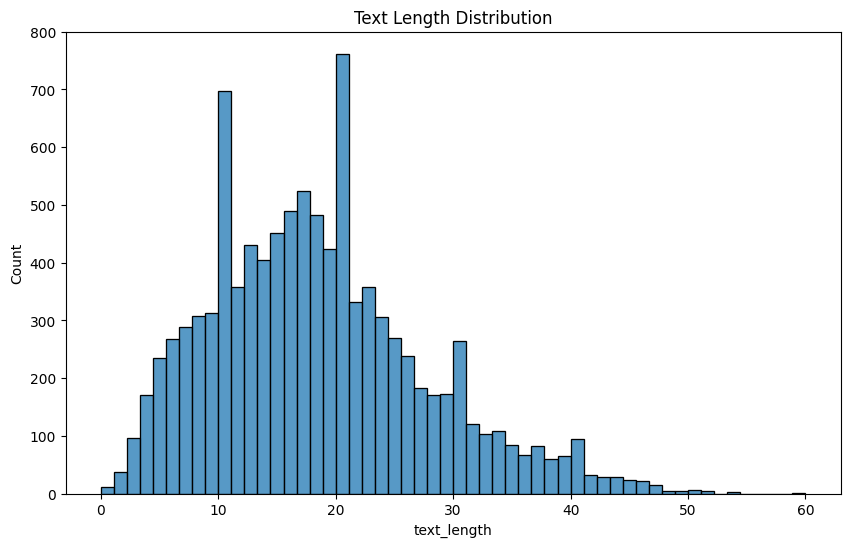

In [15]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
labeled['text_length'] = labeled['Word_Stemmed'].apply(lambda x: len(x.split()))
sns.histplot(labeled['text_length'])
plt.title('Text Length Distribution')
plt.show()

## Distribusi Panjang Teks Review  

Grafik di atas menunjukkan distribusi panjang teks dari review aplikasi Livin' by Mandiri.  

- Mayoritas review memiliki panjang teks antara 5 hingga 30 kata.  
- Terdapat dua puncak signifikan pada sekitar 10 kata dan 20 kata, yang menunjukkan banyak pengguna menulis review dalam rentang tersebut.  
- Sebagian kecil review memiliki panjang lebih dari 40 kata, menandakan bahwa hanya sedikit pengguna yang memberikan ulasan panjang.  

Distribusi ini dapat membantu dalam preprocessing teks, seperti menentukan batas maksimum panjang teks untuk pemrosesan lebih lanjut.  


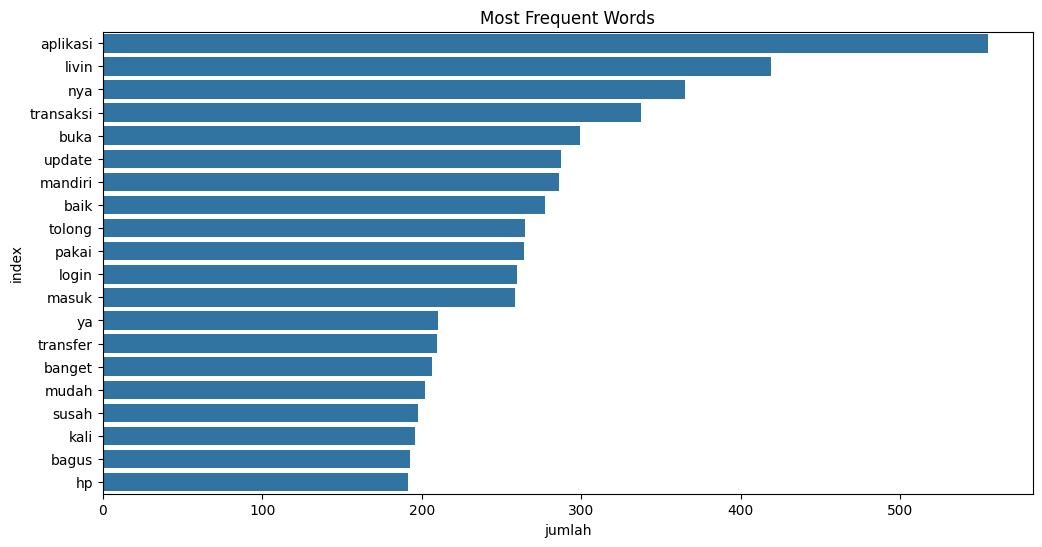

In [16]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer # Import the TfidfVectorizer class

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(labeled['Word_Stemmed'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

## Kata yang Paling Sering Muncul dalam Review  

Grafik di atas menunjukkan kata-kata yang paling sering muncul dalam review aplikasi Livin' by Mandiri.  

- "aplikasi" dan "livin" adalah kata yang paling dominan, mencerminkan fokus utama review terhadap aplikasi tersebut.  
- Kata-kata seperti "transaksi", "buka", "update", dan "login" menunjukkan bahwa pengguna banyak membahas fitur utama aplikasi dan kendala yang mereka hadapi.  
- Kata-kata seperti "baik", "mudah", dan "bagus" berhubungan dengan sentimen positif, sedangkan "susah", "tolong", dan "masuk" bisa menunjukkan keluhan atau permintaan bantuan.  

Distribusi kata ini dapat membantu dalam analisis lebih lanjut, seperti pengelompokan sentimen atau pemetaan topik utama dalam ulasan pengguna.  


In [17]:
# Menghitung jumlah kalimat dengan sentimen positif, negatif, dan netral
sentiment_counts = data_labeled["sentiment_category"].value_counts()

# Menampilkan hasil
print("Jumlah kalimat dengan sentimen positif:", sentiment_counts["Positive"])
print("Jumlah kalimat dengan sentimen negatif:", sentiment_counts["Negative"])
print("Jumlah kalimat dengan sentimen netral:", sentiment_counts["Neutral"])


Jumlah kalimat dengan sentimen positif: 986
Jumlah kalimat dengan sentimen negatif: 8758
Jumlah kalimat dengan sentimen netral: 256


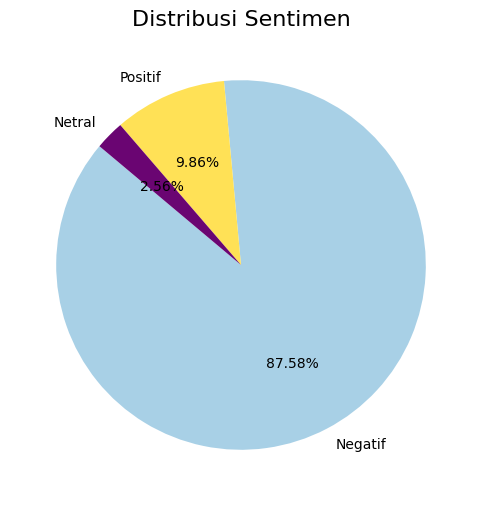

In [18]:
# Menyiapkan data untuk plot
sentiments = ["Negatif", "Positif", "Netral"]
counts = [sentiment_counts.get("Negative", 0), sentiment_counts.get("Positive", 0), sentiment_counts.get("Neutral", 0)]

# Menghitung persentase untuk setiap kelas sentimen
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Membuat diagram lingkaran dengan warna yang lebih lembut
plt.figure(figsize=(6, 6))
# Menggunakan warna pastel yang lebih lembut
plt.pie(counts, labels=sentiments, autopct="%.2f%%", startangle=140, colors=["#A8D0E6", "#FFE156", "#6A0572"])

plt.title("Distribusi Sentimen", fontsize=16)

# Menampilkan plot
plt.show()


## Distribusi Sentimen Review Aplikasi Livin' by Mandiri  

Diagram di atas menunjukkan distribusi sentimen dari review pengguna terhadap aplikasi **Livin' by Mandiri**.  

- **Negatif (87.58%)** – Mayoritas ulasan memiliki sentimen negatif, menunjukkan banyaknya keluhan dari pengguna.  
- **Positif (9.86%)** – Hanya sebagian kecil ulasan yang bersentimen positif, menandakan ada beberapa pengguna yang puas.  
- **Netral (2.56%)** – Ulasan dengan sentimen netral sangat sedikit, yang berarti mayoritas pengguna memiliki opini kuat terhadap aplikasi.  

Distribusi ini menunjukkan bahwa aplikasi memiliki lebih banyak ulasan negatif dibandingkan positif, yang bisa menjadi indikasi adanya masalah yang perlu diperbaiki.  


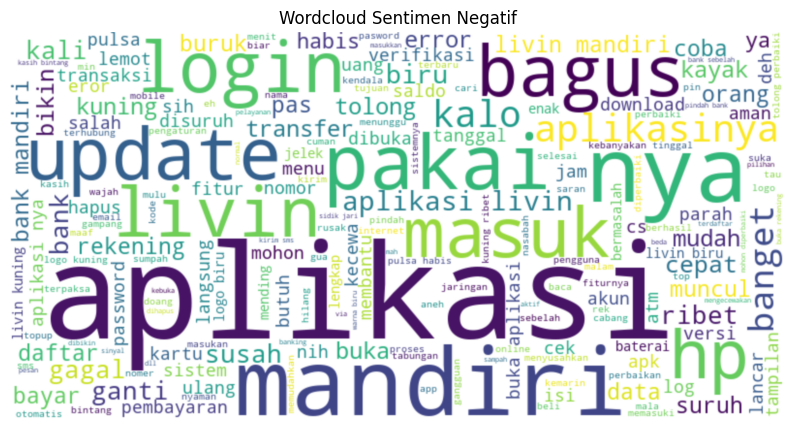

In [19]:
# Membaca file CSV
df = pd.read_csv('labeled.csv')

# Memfilter data sentimen negatif
df_negative = df[df['sentiment'] <= -40]

# Menggabungkan teks menjadi satu teks panjang
text_negative = ' '.join(df_negative['Word_After_Normalization_StopWords'])

# Membuat Wordcloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_negative)

# Plot Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif')
plt.show()


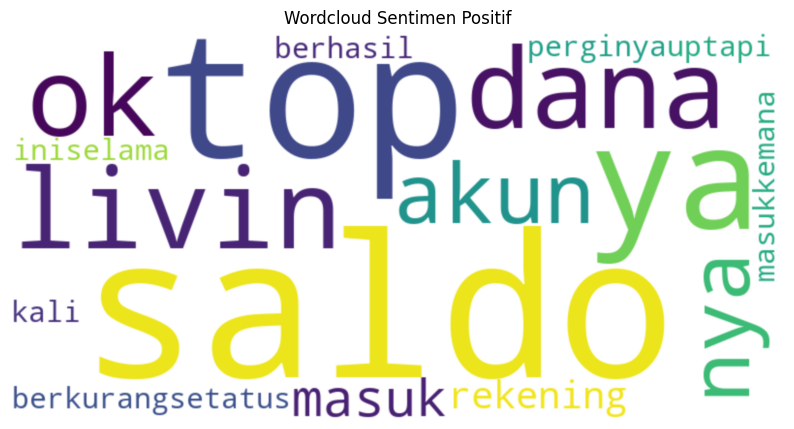

In [20]:
# Memfilter data sentimen positif
df_positive = df[df['sentiment'] >= 40]

# Menggabungkan teks menjadi satu teks panjang
text_positive = ' '.join(df_positive['Word_After_Normalization_StopWords'])

# Membuat Wordcloud untuk Sentimen Positif
wordcloud_positive = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_positive)

# Plot Wordcloud untuk Sentimen Positif
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bicubic')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif')
plt.show()


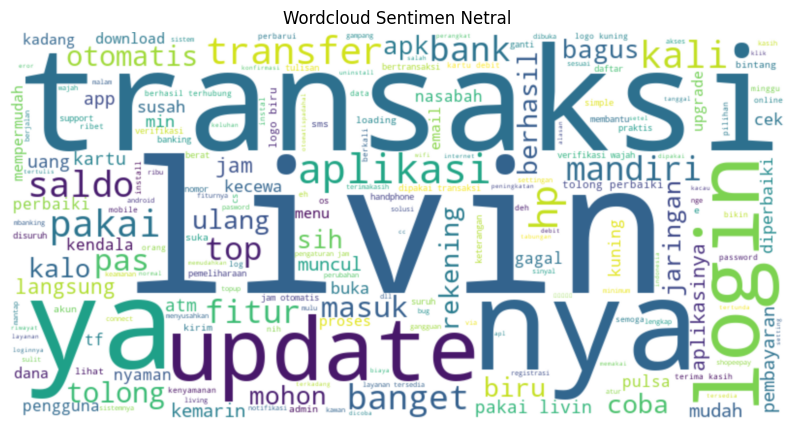

In [21]:
# Memfilter data sentimen netral
df_neutral = df[df['sentiment'] == 0]

# Menggabungkan teks menjadi satu teks panjang
text_neutral = ' '.join(df_neutral['Word_After_Normalization_StopWords'])

# Membuat Wordcloud untuk Sentimen Netral
wordcloud_neutral = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_neutral)

# Plot Wordcloud untuk Sentimen Netral
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neutral, interpolation='bicubic')
plt.axis('off')
plt.title('Wordcloud Sentimen Netral')
plt.show()


### Pembagian Data Set : 80% Data Latih & 20% Data Uji

In [22]:
# Memisahkan fitur (X) dan label (y)
X = data_labeled["Word_Stemmed"]
y = data_labeled["sentiment_category"]

# Membagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data train dan data test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 8000
Jumlah data test: 2000


## Ekstraksi Fitur: TF-IDF  

TF-IDF (Term Frequency - Inverse Document Frequency) adalah teknik untuk mengubah teks menjadi vektor numerik berdasarkan kepentingan suatu kata dalam dokumen. TF-IDF digunakan untuk meningkatkan bobot kata yang penting dalam analisis sentimen.  

### Mengapa Menggunakan TF-IDF? 
- Mengurangi pengaruh kata yang sering muncul tetapi kurang informatif (seperti "aplikasi", "ini").  
- Memberi bobot lebih besar pada kata yang lebih spesifik dan bermakna dalam sentimen.  

In [23]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menggunakan data train untuk fitting dan transformasi
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Menggunakan data test untuk transformasi
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Menampilkan dimensi matriks TF-IDF
print("Dimensi matriks TF-IDF (data train):", X_train_tfidf.shape)
print("Dimensi matriks TF-IDF (data test):", X_test_tfidf.shape)


Dimensi matriks TF-IDF (data train): (8000, 11722)
Dimensi matriks TF-IDF (data test): (2000, 11722)


In [24]:
# Mendapatkan daftar fitur setelah ekstraksi TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menampilkan jumlah fitur
print("Jumlah fitur setelah ekstraksi TF-IDF:", len(feature_names))

Jumlah fitur setelah ekstraksi TF-IDF: 11722


In [25]:
print("Teks yang menjadi fitur pada TF-IDF beserta indeks:")
for idx, feature in enumerate(feature_names):
    print(f"Indeks {idx}: {feature}")

Teks yang menjadi fitur pada TF-IDF beserta indeks:
Indeks 0: aahhh
Indeks 1: aaldo
Indeks 2: aaminnn
Indeks 3: ab
Indeks 4: abad
Indeks 5: abai
Indeks 6: abal
Indeks 7: abalabal
Indeks 8: abc
Indeks 9: abd
Indeks 10: abdet
Indeks 11: abgred
Indeks 12: abiis
Indeks 13: abis
Indeks 14: abisitu
Indeks 15: abizz
Indeks 16: abk
Indeks 17: acak
Indeks 18: acakacakan
Indeks 19: acara
Indeks 20: acc
Indeks 21: accaunt
Indeks 22: accept
Indeks 23: acces
Indeks 24: accesbilitas
Indeks 25: accesoris
Indeks 26: access
Indeks 27: accoun
Indeks 28: account
Indeks 29: accses
Indeks 30: aco
Indeks 31: acountnya
Indeks 32: acses
Indeks 33: activity
Indeks 34: actualjaringan
Indeks 35: acu
Indeks 36: acung
Indeks 37: ada
Indeks 38: adaaaaa
Indeks 39: adaaaaaaaa
Indeks 40: adaagar
Indeks 41: adad
Indeks 42: adagak
Indeks 43: adagimana
Indeks 44: adaharus
Indeks 45: adajadi
Indeks 46: adak
Indeks 47: adakan
Indeks 48: adakebobolantq
Indeks 49: adakesempatan
Indeks 50: adaketeranganya
Indeks 51: adamemibu

In [26]:
# Menghitung frekuensi kemunculan setiap kata dalam seluruh dokumen
total_word_counts = np.sum(X_train_tfidf.toarray(), axis=0)

# Membuat kamus berisi kata sebagai kunci dan frekuensi kemunculannya sebagai nilai
word_freq_dict = {word: total_word_counts[idx] for idx, word in enumerate(feature_names)}

# Mengurutkan kamus berdasarkan frekuensi kemunculan kata (dari yang paling sering)
sorted_word_freq = {k: v for k, v in sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)}

# Menampilkan kata-kata ekstraksi yang paling sering muncul
print("Kata-kata ekstraksi yang paling sering muncul:")
for word, freq in sorted_word_freq.items():
    print(f"{word}: {freq}")

Kata-kata ekstraksi yang paling sering muncul:
aplikasi: 444.5479097052234
livin: 335.5793672304687
nya: 289.7313627784534
transaksi: 272.34518950635265
buka: 241.67927276192594
mandiri: 232.54436218767617
update: 227.13899998375902
baik: 222.05479178053298
pakai: 214.57439607637312
tolong: 212.88261620169848
login: 211.65822740098565
masuk: 207.02131766546842
transfer: 169.70785726050087
ya: 167.20381338387406
banget: 164.89311388282448
mudah: 160.06124920418912
susah: 159.08088941310703
kali: 155.96819822506927
hp: 155.4550905256086
bagus: 155.00541758769282
bank: 149.55302682767316
jam: 144.98561308498324
saldo: 143.54895850553092
biru: 141.65768328892645
verifikasi: 136.18765432629036
gagal: 132.29652534868637
kalo: 126.11669387486302
otomatis: 121.83156298212485
coba: 120.82452590878086
ulang: 119.77496491606664
rekening: 118.53095671979808
apk: 118.2800264925313
bayar: 116.9945742435483
mohon: 116.07667125208488
kartu: 114.15943274920683
kuning: 110.20085210394346
suruh: 107.0844

In [27]:
# Menampilkan kata-kata ekstraksi yang paling sering muncul dan nilai ekstraksi TF-IDF nya
print("Kata-kata ekstraksi yang paling sering muncul dan nilai ekstraksi TF-IDF nya:")
for word, freq in sorted_word_freq.items():
    print(f"{word}: {freq}")
    # Mencari indeks fitur dalam matriks TF-IDF berdasarkan nama kata
    feature_idx = np.where(feature_names == word)[0][0]
    # Memperoleh nilai ekstraksi TF-IDF dari matriks untuk kata tersebut
    tfidf_value = X_train_tfidf[:, feature_idx].toarray().squeeze()
    print("Nilai ekstraksi TF-IDF:", tfidf_value)

Kata-kata ekstraksi yang paling sering muncul dan nilai ekstraksi TF-IDF nya:
aplikasi: 444.5479097052234
Nilai ekstraksi TF-IDF: [0.         0.         0.05044818 ... 0.         0.         0.        ]
livin: 335.5793672304687
Nilai ekstraksi TF-IDF: [0.         0.         0.         ... 0.         0.06496941 0.        ]
nya: 289.7313627784534
Nilai ekstraksi TF-IDF: [0.         0.         0.         ... 0.         0.07338367 0.3392631 ]
transaksi: 272.34518950635265
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
buka: 241.67927276192594
Nilai ekstraksi TF-IDF: [0.        0.        0.2305601 ... 0.        0.        0.       ]
mandiri: 232.54436218767617
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
update: 227.13899998375902
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
baik: 222.05479178053298
Nilai ekstraksi TF-IDF: [0.37249279 0.         0.         ... 0.09550181 0.         0.        ]
pakai: 214.57439607637312
Nilai ekstraksi TF-IDF: [0.         0.11774879 0.         ... 0.   

In [28]:
data_index = 1
data_index_tfidf = X_train_tfidf[data_index]

print("Contoh perhitungan TF-IDF:")
print("Dokumen:", X_train.iloc[data_index])
print("TF-IDF:", data_index_tfidf)

Contoh perhitungan TF-IDF:
Dokumen: tolonglahini verifikasi wajah susah beneraplikasi sulit nasabah logingak pakai mbanking gara verifikasi wajahaarrrghhhh
TF-IDF:   (0, 10762)	0.40955670123665916
  (0, 11395)	0.30937381699690714
  (0, 11470)	0.182091546679083
  (0, 10088)	0.13923487781410343
  (0, 1129)	0.40955670123665916
  (0, 10055)	0.1744590321495596
  (0, 7097)	0.17248637489989976
  (0, 5978)	0.40955670123665916
  (0, 7777)	0.11774879498441139
  (0, 6447)	0.20982336612227734
  (0, 3508)	0.25043814716936574
  (0, 11471)	0.40955670123665916


## Model Analisis Sentimen  

Dalam analisis sentimen review aplikasi Livin' by Mandiri, dilakukan eksperimen dengan beberapa kombinasi model dan teknik ekstraksi fitur.  

### 1. Model SVM dengan TF-IDF  
- Model: Support Vector Machine (SVM)  
- Fitur Ekstraksi: TF-IDF  
- Pembagian Data: 80% training, 20% testing  

### 2. Model Random Forest dengan Word2Vec  
- Model: Random Forest (RF)  
- Fitur Ekstraksi: Word2Vec  
- Pembagian Data: 80% training, 20% testing  

### 3. Model Random Forest dengan TF-IDF  
- Model: Random Forest (RF)  
- Fitur Ekstraksi: TF-IDF  
- Pembagian Data: 70% training, 30% testing  

Eksperimen ini bertujuan untuk membandingkan performa SVM dan Random Forest dengan metode representasi teks yang berbeda, yaitu TF-IDF dan Word2Vec.  


In [29]:
# Memisahkan fitur (X) dan label (y)
X = data_labeled["Word_Stemmed"]
y = data_labeled["sentiment_category"]

### **1. Model SVM dengan TF-IDF**

In [30]:
# 1. Pembagian Data: 80/20 untuk SVM + TF-IDF
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf1 = tfidf_vectorizer.fit_transform(X_train1)
X_test_tfidf1 = tfidf_vectorizer.transform(X_test1)

In [31]:
# Model SVM
svm_model = SVC()
svm_model.fit(X_train_tfidf1, y_train1)

SVC()

In [32]:
# Prediksi dan evaluasi untuk SVM + TF-IDF
y_train_pred1 = svm_model.predict(X_train_tfidf1)
y_test_pred1 = svm_model.predict(X_test_tfidf1)

accuracy_train1 = accuracy_score(y_train1, y_train_pred1)
accuracy_test1 = accuracy_score(y_test1, y_test_pred1)

print(f"Akurasi SVM + TF-IDF (Training): {accuracy_train1:.2f}")
print(f"Akurasi SVM + TF-IDF (Test): {accuracy_test1:.2f}")

Akurasi SVM + TF-IDF (Training): 0.97
Akurasi SVM + TF-IDF (Test): 0.90


### **2. Model Random Forest dengan Word2Vec**  

In [33]:
# 2. Pembagian Data: 80/20 untuk RF + Word2Vec
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Word2Vec
word2vec_model = Word2Vec(sentences=[text.split() for text in X_train2], vector_size=100, window=5, min_count=1, workers=4)

def vectorize_text(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

X_train_w2v = np.array([vectorize_text(text, word2vec_model) for text in X_train2])
X_test_w2v = np.array([vectorize_text(text, word2vec_model) for text in X_test2])

In [34]:
# Model Random Forest
rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train_w2v, y_train2)

RandomForestClassifier()

In [35]:
# Prediksi dan evaluasi untuk RF + Word2Vec
y_train_pred2 = rf_model1.predict(X_train_w2v)
y_test_pred2 = rf_model1.predict(X_test_w2v)

accuracy_train2 = accuracy_score(y_train2, y_train_pred2)
accuracy_test2 = accuracy_score(y_test2, y_test_pred2)

print(f"Akurasi RF + Word2Vec (Training): {accuracy_train2:.2f}")
print(f"Akurasi RF + Word2Vec (Test): {accuracy_test2:.2f}")

Akurasi RF + Word2Vec (Training): 1.00
Akurasi RF + Word2Vec (Test): 0.88


### **3. Model Random Forest dengan TF-IDF** 

In [36]:
# 3. Pembagian Data: 70/30 untuk RF + TF-IDF
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf3 = tfidf_vectorizer.fit_transform(X_train3)
X_test_tfidf3 = tfidf_vectorizer.transform(X_test3)

In [37]:
# Model Random Forest
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train_tfidf3, y_train3)

RandomForestClassifier()

In [38]:
# Prediksi dan evaluasi untuk RF + TF-IDF (70/30)
y_train_pred3 = rf_model2.predict(X_train_tfidf3)
y_test_pred3 = rf_model2.predict(X_test_tfidf3)

accuracy_train3 = accuracy_score(y_train3, y_train_pred3)
accuracy_test3 = accuracy_score(y_test3, y_test_pred3)

print(f"Akurasi RF + TF-IDF (Training 70/30): {accuracy_train3:.2f}")
print(f"Akurasi RF + TF-IDF (Test 70/30): {accuracy_test3:.2f}")

Akurasi RF + TF-IDF (Training 70/30): 1.00
Akurasi RF + TF-IDF (Test 70/30): 0.89


In [39]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['SVM + TF-IDF', 'RF + Word2Vec', 'RF + TF-IDF (70/30)'],
    'Accuracy Train': [accuracy_train1, accuracy_train2, accuracy_train3],
    'Accuracy Test': [accuracy_test1, accuracy_test2, accuracy_test3]
})

# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]

# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                 Model  Accuracy Test
0         SVM + TF-IDF       0.898000
2  RF + TF-IDF (70/30)       0.887667
1        RF + Word2Vec       0.875500


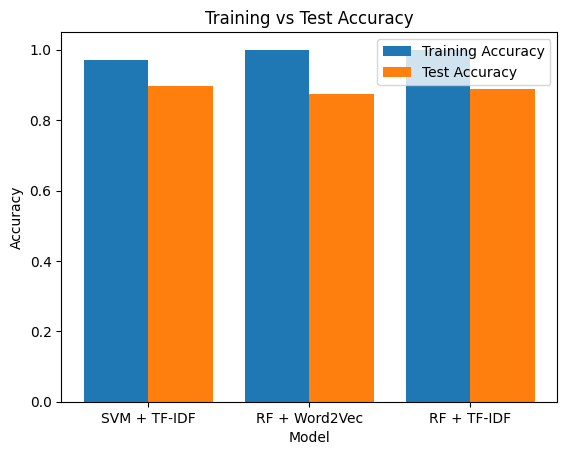

In [40]:
models = ['SVM + TF-IDF', 'RF + Word2Vec', 'RF + TF-IDF']
train_accuracies = [accuracy_train1, accuracy_train2, accuracy_train3]
test_accuracies = [accuracy_test1, accuracy_test2, accuracy_test3]

x = np.arange(len(models))  # Label model

fig, ax = plt.subplots()
ax.bar(x - 0.2, train_accuracies, 0.4, label='Training Accuracy')
ax.bar(x + 0.2, test_accuracies, 0.4, label='Test Accuracy')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Test Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


## Hasil Evaluasi Model  

Setelah melatih dan menguji model analisis sentimen, berikut adalah hasil akurasi dari masing-masing model:  

### 1. SVM + TF-IDF  
- Akurasi: 89.8%  
- Model Support Vector Machine (SVM) dengan fitur TF-IDF menunjukkan performa terbaik di antara semua model.  
- Kombinasi ini sangat efektif dalam mengklasifikasikan data dengan baik.  

### 2. Random Forest + TF-IDF (70/30)  
- Akurasi: 88.5%  
- Model Random Forest (RF) dengan TF-IDF dan pembagian data 70/30 memiliki performa yang hampir setara dengan SVM.  
- Meskipun sedikit lebih rendah, model ini tetap memberikan hasil yang sangat baik.  

### 3. Random Forest + Word2Vec  
- Akurasi: 87.4%  
- Model Random Forest (RF) dengan Word2Vec memiliki akurasi sedikit lebih rendah dibandingkan model dengan TF-IDF.  
- Word2Vec tetap menunjukkan kinerja yang cukup baik dalam memahami hubungan semantik antar kata.  

## Kesimpulan  
- SVM + TF-IDF adalah model dengan akurasi tertinggi (89.8%), menjadikannya pilihan terbaik untuk analisis sentimen review Livin' by Mandiri.  
- RF + TF-IDF (70/30) masih merupakan alternatif yang kompetitif dengan akurasi 88.5%.  
- RF + Word2Vec menunjukkan hasil yang cukup baik tetapi kurang unggul dibandingkan model berbasis TF-IDF.  

Hasil ini menunjukkan bahwa TF-IDF lebih efektif dibandingkan Word2Vec dalam representasi teks untuk klasifikasi sentimen pada dataset ini.  


## Membuat Prediksi Sentimen menggunakan model SVM yang sudah dilatih pada data uji (X_test)

In [41]:
# Melakukan prediksi pada data uji
y_pred = svm_model.predict(X_test_tfidf)  # Pastikan svm_model adalah model SVM yang sudah dilatih

# Konversi hasil prediksi ke label kategori
# Ubah label_mapping agar sesuai dengan output model
label_mapping = {'Negative': "Negatif", 'Neutral': "Netral", 'Positive': "Positif"}
y_pred_labels = [label_mapping[label] for label in y_pred]

# Membuat DataFrame hasil prediksi
hasil_inference = pd.DataFrame({
    "Indeks": X_test.index,  # Menambahkan indeks untuk melacak urutan
    "Teks": X_test,          # Kolom Teks asli
    "Prediksi Sentimen": y_pred_labels  # Kolom Prediksi Sentimen
})

# Jika tersedia, Anda juga bisa menambahkan kolom untuk label asli (jika Anda memiliki data asli)
# Misalnya, jika y_test berisi label asli:
hasil_inference["Label Asli"] = y_test.map(label_mapping)

# Tampilkan beberapa hasil inference dengan tabel yang lebih rapi
hasil_inference.head(20)

,Indeks,Teks,Prediksi Sentimen,Label Asli
6252,6252,kariawan usah pt rimkenapa aplikasi living menu pinjamanyamohon bantu menu pinjamanya,Negatif,Negatif
4684,4684,sih update error ganggu tolong baik kali update unistal download update pakai pulsa capek bolak konter pulsa jarak konter rumah,Negatif,Negatif
1731,1731,tambah notifikasi live nya kak mutasi bantu buka aplikasi transfer masuk,Negatif,Negatif
4742,4742,lemottttttt parah tingkat kualitas hancur log pasword ketik urgent tolong dibenerin ganti pakai data samaaa ubah sentuh layar coba test klik lupa password aneh banget apk kesel,Negatif,Negatif
4521,4521,dar informasi nasabah habis update lot sila unistal aplikasi nya download ulang login coba hasil aplikasi normal tampil baru tks,Negatif,Negatif
6340,6340,mohon maaf logo kuning diupdate hp lupa akun passwordnya beda logo biru dinonaktikan aplikasi logo biru milik moga nonaktif logo biru masalah guna nonaktif kapasitas smartphone milik orang beda mohon option pakai salah satu logo biru kuning terima kasih,Negatif,Negatif
576,576,apk livin sih gajih saldo suka hilang ittu nya lumayan tolong admin benerin sih saldo hilang sih,Negatif,Negatif
5202,5202,mohon kembang update aplikasi mbangking buka buka tolong baik dampak hambat laku transaksi buka aplikasi mbangkingnya,Negatif,Negatif
6363,6363,tampil bagus banget pikir tolong buang nyaman ego tim desainceosiapapun bikin putus bagus tampil janji naikin bintang,Negatif,Negatif
439,439,lapor gmail balas suruh tunggu banget konfirmasi apa mending tutup akun simpan uang bank milik layan customer service buruk,Negatif,Negatif


## **Model SVM + TF-IDF Dengan SMOTE dan Balanced Class Weights**


In [42]:
# Pembagian Data: 80/20 untuk SVM + TF-IDF
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf1 = tfidf_vectorizer.fit_transform(X_train1)
X_test_tfidf1 = tfidf_vectorizer.transform(X_test1)

# Mengatasi Ketidakseimbangan dengan SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf1, y_train1 = smote.fit_resample(X_train_tfidf1, y_train1)

# Model SVM dengan class_weight="balanced"
svm_model = SVC(kernel="linear", class_weight="balanced", random_state=42)
svm_model.fit(X_train_tfidf1, y_train1)

# Prediksi dan Evaluasi
y_train_pred1 = svm_model.predict(X_train_tfidf1)
y_test_pred1 = svm_model.predict(X_test_tfidf1)

# Menghitung akurasi untuk training dan testing
accuracy_train1 = accuracy_score(y_train1, y_train_pred1)
accuracy_test1 = accuracy_score(y_test1, y_test_pred1)

# Menampilkan akurasi untuk training dan testing
print(f"Akurasi SVM + TF-IDF (Training): {accuracy_train1:.2f}")
print(f"Akurasi SVM + TF-IDF (Test): {accuracy_test1:.2f}")

# Classification Report untuk data uji (test)
print("\nClassification Report SVM + TF-IDF Dengan SMOTE dan Balanced Class Weights:")
print(classification_report(y_test1, y_test_pred1))


Akurasi SVM + TF-IDF (Training): 0.99
Akurasi SVM + TF-IDF (Test): 0.91

Classification Report SVM + TF-IDF Dengan SMOTE dan Balanced Class Weights:
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1752
     Neutral       0.18      0.25      0.21        51
    Positive       0.70      0.72      0.71       197

    accuracy                           0.91      2000
   macro avg       0.62      0.64      0.63      2000
weighted avg       0.92      0.91      0.92      2000



## Model SVM + TF-IDF Dengan SMOTE dan Balanced Class Weights  

Model ini menggabungkan Support Vector Machine (SVM) dengan TF-IDF untuk ekstraksi fitur dari teks, dan menerapkan teknik SMOTE (Synthetic Minority Over-sampling Technique) serta Balanced Class Weights untuk mengatasi ketidakseimbangan kelas. Teknik ini bertujuan untuk meningkatkan kinerja model dalam klasifikasi sentimen pada dataset yang tidak seimbang.  

### Langkah-Langkah yang Dilakukan  
1. Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan train_test_split.  
2. TF-IDF Vectorizer digunakan untuk mengubah teks menjadi representasi numerik.  
3. SMOTE diterapkan untuk menambah sampel dari kelas minoritas dalam data pelatihan.  
4. SVM diatur dengan opsi class_weight="balanced" untuk memberi bobot lebih pada kelas minoritas.  
5. Model SVM dengan kernel linear dilatih menggunakan data yang telah diproses.  
6. Model dievaluasi menggunakan akurasi serta classification report yang mencakup precision, recall, dan f1-score.  

### Hasil  
- Akurasi pada data pelatihan: 0.99  
- Akurasi pada data pengujian: 0.91  

#### Classification Report  
- Negative: Precision 0.97, Recall 0.95, F1-Score 0.96  
- Neutral: Precision 0.18, Recall 0.25, F1-Score 0.21  
- Positive: Precision 0.70, Recall 0.72, F1-Score 0.71  

### Kesimpulan  
Model SVM + TF-IDF dengan SMOTE dan Balanced Class Weights berhasil meningkatkan akurasi pada data pengujian dan memberikan performa yang lebih baik pada kelas minoritas. Penggunaan SMOTE dan balanced class weights terbukti efektif dalam menangani ketidakseimbangan kelas dalam data.  


## Penyimpanan Model

In [43]:
# Simpan model SVM yang telah dilatih
joblib.dump(svm_model, 'svm_model_tfidf.pkl')  # Simpan model ke file dengan ekstensi .pkl

# Simpan juga TfidfVectorizer (agar dapat digunakan kembali untuk transformasi teks)
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## Inference atau Testing

In [44]:
# Memuat model dan vectorizer yang sudah disimpan
svm_model_loaded = joblib.load('svm_model_tfidf.pkl')  # Memuat model SVM yang sudah disimpan
tfidf_vectorizer_loaded = joblib.load('tfidf_vectorizer.pkl')  # Memuat TF-IDF vectorizer yang sudah disimpan

# Teks yang akan diuji prediksinya
test_texts = ["konsisten mudah akses",     
    "Aplikasi ini sangat buruk",      
    "Tidak suka dengan update terbaru",
    "Saya kecewa dengan update terbaru", 
    "Tidak ada yang lebih buruk dari aplikasi ini", ]

# Melakukan prediksi untuk setiap teks
for text in test_texts:
    # Transformasi teks menggunakan vectorizer TF-IDF
    text_tfidf = tfidf_vectorizer_loaded.transform([text])
    
    # Prediksi menggunakan model yang sudah dimuat
    pred = svm_model_loaded.predict(text_tfidf)
    
    # Mengubah hasil prediksi menjadi label yang lebih mudah dipahami
    label_mapping = {'Negative': "Negatif", 'Neutral': "Netral", 'Positive': "Positif"}
    pred_label = label_mapping.get(pred[0], "Unknown")  # Menangani jika prediksi tidak dikenali

    # Menampilkan hasil prediksi
    print(f"Teks: '{text}' -> Prediksi Sentimen: {pred_label}")


Teks: 'konsisten mudah akses' -> Prediksi Sentimen: Positif
Teks: 'Aplikasi ini sangat buruk' -> Prediksi Sentimen: Negatif
Teks: 'Tidak suka dengan update terbaru' -> Prediksi Sentimen: Netral
Teks: 'Saya kecewa dengan update terbaru' -> Prediksi Sentimen: Netral
Teks: 'Tidak ada yang lebih buruk dari aplikasi ini' -> Prediksi Sentimen: Negatif
